In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 2', 'ESI 3', 'ESI 4', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 1'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 1']

In [9]:
print(esi1_daily_df)

           Date  ESI 1
0    2017-01-01      6
1    2017-01-02      5
2    2017-01-03      5
3    2017-01-04      5
4    2017-01-05      2
...         ...    ...
1456 2020-12-27     13
1457 2020-12-28     11
1458 2020-12-29      2
1459 2020-12-30      8
1460 2020-12-31      5

[1461 rows x 2 columns]


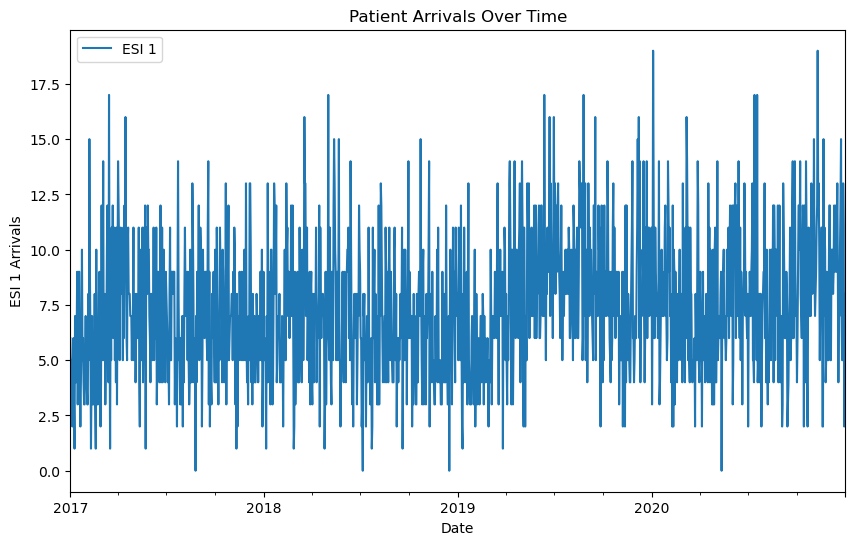

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 1', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 1 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = ExponentialSmoothing(train['ESI 1'], seasonal='add', seasonal_periods=7)
fitted_model = model.fit()

In [13]:
forecast_values = fitted_model.forecast(len(test))

In [14]:
forecast_values

1314    7.070018
1315    8.196509
1316    7.993729
1317    8.050393
1318    7.569836
          ...   
1456    7.993729
1457    8.050393
1458    7.569836
1459    7.786081
1460    7.135309
Length: 147, dtype: float64

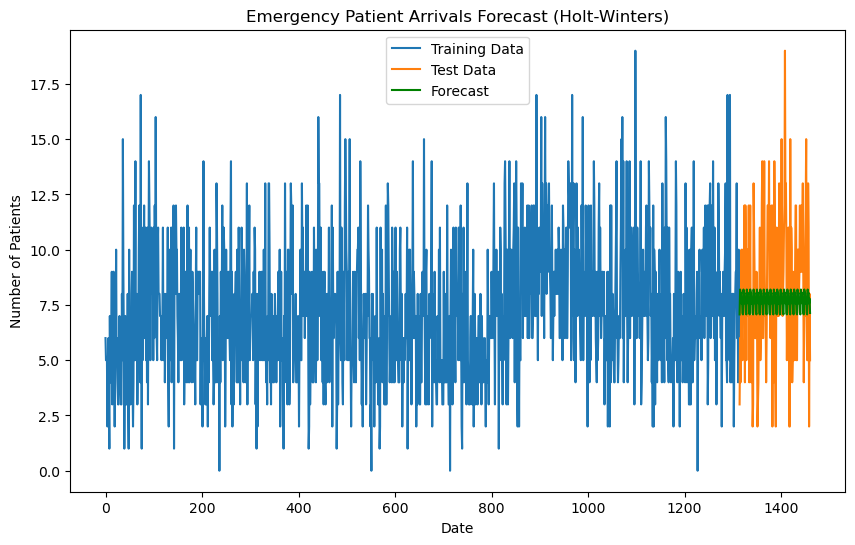

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 1'], label='Training Data')
plt.plot(test.index, test['ESI 1'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast', color='green')
plt.title('Emergency Patient Arrivals Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['ESI 1'], forecast_values)
print("MAPE:", mape)

MAPE: 44.94036466463979


In [17]:
rmse = np.sqrt(mean_squared_error(test['ESI 1'], forecast_values))
print("RMSE:", rmse)

RMSE: 3.3546991426242845


In [18]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 1'], forecast_values)
print("MAE:", mae)

MAE: 2.7807555502646126
